# EDA

In [58]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.graph_objects as go

# plt.style.use('ggplot')
%matplotlib inline

### Original Image

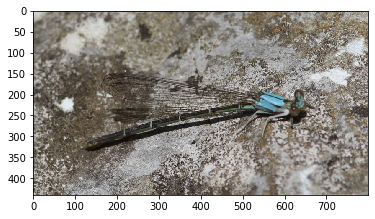

In [59]:
imagepath = r'E:\images2019\train_val2019\Damselflies\000c82a31b01641febe92ba83e64abb0.jpg'
image = Image.open(imagepath)
plt.imshow(image)

### Resizsing Image

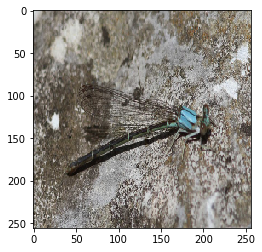

In [18]:
dimensions = (256, 256)
image = image.resize(dimensions)
plt.imshow(image)

### Grayscaling Image

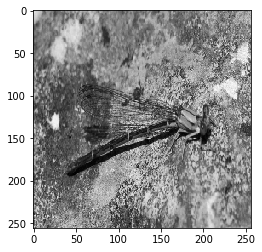

In [19]:
image = image.convert(mode='L')
plt.imshow(image, cmap='gray')

### Rotate Image to Increase the Dataset

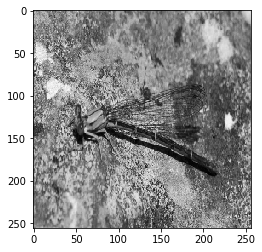

In [20]:
chirl_image = image.transpose(Image.FLIP_LEFT_RIGHT)
plt.imshow(chirl_image, cmap='gray')

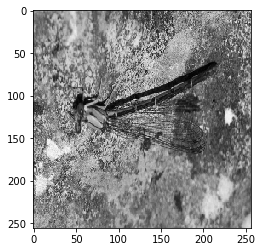

In [21]:
rotated = image.rotate(180)
plt.imshow(rotated, cmap='gray')

### Noramalize Pixel Values

In [7]:
image = np.array(image)

print(f'First pixel value: {image[0][0]}')
print(f'Image shape: {image.shape}')

image = image / 255

print(f'First pixel value after normalizing: {image[0][0]}')

First pixel value: 200
Image shape: (256, 256)
First pixel value after normalizing: 0.7843137254901961


### Checking for Class Imbalance 

In [9]:
dampath = r'E:\classification_damsel_images\\'
extension = 'jpg'

dam = os.listdir(dampath)
damsels = len(dam)
train_dames = int(damsels * 0.75)

In [10]:
danpath = r'E:\classification_dragon_images\\'
extension = 'jpg'

dra = os.listdir(danpath) 
dragons = len(dra)
train_drags = int(dragons * 0.75)

In [57]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=['Damsels', 'Dragons'],
    y=[damsels, dragons]
))

fig.update_layout(autosize=False,
                  width=600,
                  height=550,

                  yaxis=go.layout.YAxis(
                      title_text='Number of Images',
                      titlefont=dict(size=18),
                  ),

                  title=go.layout.Title(
                      text='Images per Species',
                      font=dict(size=22),
                      xref='paper'

                  ))

fig.update_yaxes(automargin=True)

fig.show()
